In [2]:
import numpy as np
import pandas as pd
# for calculating the distance
import math
import matplotlib.pyplot as plt
import os

In [3]:
# create an empty dataframe
# N means the name of the nucleuotide
rna_df = pd.DataFrame(columns=['Atom', 'N', 'Chain', 'X','Y','Z'])
rna_df

,Atom,N,Chain,X,Y,Z


<font size=4>Read the pdb files line by line</font>

In [4]:
# read the 10 pdb files and choose the C3' atoms and put them into the dataframe
dir_path = 'pdb/'
i = 0
for path in os.listdir(dir_path):
    if 'pdb' in path:
        p = '{}{}'.format(dir_path,path)
        print(p)
        with open(p,'r') as pdbfile:
            for line in pdbfile:
                if line[:4] == 'ATOM' and line[13:16] == "C3'":
                    rna_data = [line[13:16],line[19:20],line[21:22]+str(i),line[32:38],line[40:46],line[48:54]]
                    # rna_df = rna_df.append(rna_data, ignore_index=True)
                    rna_df.loc[len(rna_df)] = rna_data
            i += 1
                    

pdb/3b31.pdb
pdb/4cs1.pdb
pdb/2n0j.pdb
pdb/1jtw.pdb
pdb/1f7g.pdb
pdb/2rlu.pdb
pdb/4gxy.pdb
pdb/1mv6.pdb
pdb/283d.pdb
pdb/4p5j.pdb


In [7]:
rna_df['Chain'].unique()

array(['A0', 'B0', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'B7', 'A8',
       'A9'], dtype=object)

In [8]:
rna_df.head()

,Atom,N,Chain,X,Y,Z
0,C3',G,A0,-6.100,21.848,42.828
1,C3',G,A0,-2.871,24.876,46.450
2,C3',U,A0,1.752,25.996,49.735
3,C3',U,A0,6.836,24.352,51.183
4,C3',A,A0,11.897,21.350,50.987


In [236]:
# rna_df.index[rna_df['N']=='T'].tolist()

In [238]:
rna_df.shape

(1772, 6)

In [14]:
list(rna_df.iloc[0,3:6])

[-6.1, 21.848, 42.828]

In [13]:
# convert data type 
rna_df = rna_df.astype({'X':'float','Y':'float','Z':'float'})
rna_df.dtypes

Atom      object
N         object
Chain     object
X        float64
Y        float64
Z        float64
dtype: object

In [15]:
len(rna_df.iloc[:,3:6])

1772

In [143]:
# # convert dataframe to array
# cordinates = rna_df.iloc[:,3:6]
# cordinates = cordinates.to_numpy()

In [104]:
# cordinates = cordinates.to_numpy()

In [144]:
# cordinates.shape

(1772, 3)

In [145]:
# r,c = cordinates.shape
# r

1772

<font size=4>Calculate Euclidean distance of two C3 atom and keep distance <20 </font>

In [146]:
# # calculate the distance between each two C3 and put the results into an array
# def distances(cordinates):
#     ns = ['A','C','G','U']
#     dic_pair={}
#     # create an empty dictionary with 10 keys
#     for a in range(len(ns)):
#         for b in range(a,len(ns)):
#             key = '{}{}'.format(ns[a],ns[b])
#             dic_pair[key]=[]
#     # dic_pair = create_dic()
#     # distance_arr = np.empty([r,r])
#     for i in range(r-4):
#         for j in range(i+4,r):
#             # calculate the distance between two C3
#             distance = math.dist(cordinates[i],cordinates[j])
#             pair = '{}{}'.format(rna_df.loc[i,'N'],rna_df.loc[j,'N'])
#             if distance < 20:
#                 if pair in dic_pair.keys():
#                     dic_pair[pair].append(int(distance))
#                 else:
#                     pair = '{}{}'.format(rna_df.loc[j,'N'],rna_df.loc[i,'N'])
#                     dic_pair[pair].append(int(distance))
#     return dic_pair

In [18]:
# calculate the distance between each two C3 and put the results into an array
def distances(df):
    ns = ['A','C','G','U']
    dic_pair={}
    # create an empty dictionary with 10 keys
    for a in range(len(ns)):
        for b in range(a,len(ns)):
            key = '{}{}'.format(ns[a],ns[b])
            dic_pair[key]=[]
    # dic_pair = create_dic()
    # distance_arr = np.empty([r,r])
    r = df.shape[0]
    for i in range(r-4):
        for j in range(i+4,r):
            # check if the pair is belong to the same chain
            if df.loc[i,'Chain'] == df.loc[i,'Chain']:
                # calculate the distance between two C3
                cordinates_i = list(rna_df.iloc[i,3:6])
                cordinates_j = list(rna_df.iloc[j,3:6])
                distance = math.dist(cordinates_i,cordinates_j)
                pair = '{}{}'.format(rna_df.loc[i,'N'],rna_df.loc[j,'N'])
                if distance < 21:
                    if pair in dic_pair.keys():
                        dic_pair[pair].append(int(distance))
                    else:
                        pair = '{}{}'.format(rna_df.loc[j,'N'],rna_df.loc[i,'N'])
                        dic_pair[pair].append(int(distance))
    return dic_pair

In [19]:
d = distances(rna_df)

In [251]:
len(d)

10

In [252]:
# print(d)

<font size=4>Calculate observed and reference frequencies</font>

In [20]:
# calculate the observed probability (i.e. frequency)
# input is the distances of i and j
def observe_frequency(Dijs):
    dic_obs={}
    for i in range(21):
        # the numebr of distances in distance i/the total number of distance of pair [i,j]
        f = Dijs.count(i)/len(Dijs)
        dic_obs[i]=f
    plt.bar(dic_obs.keys(),dic_obs.values(),width=0.9,align='edge')
    plt.xlabel('Distance')
    plt.ylabel('OBS')
    plt.show()
    return dic_obs

In [21]:
# calculate the reference frequency
def reference_frequency(d):
    dic_ref = {}
    for i in range(21):
        n_xx_d = 0
        n_xx = 0
        for k,v in d.items():
            n_xx_d += v.count(i)
            n_xx += len(v)
        dic_ref[i] = n_xx_d/n_xx
    return dic_ref

In [22]:
dic_f_ref=reference_frequency(d)
print(dic_f_ref)

{0: 0.009077588211079521, 1: 0.007490716587714116, 2: 0.006164057784309167, 3: 0.00899440542437085, 4: 0.015642629685163816, 5: 0.031268196234592524, 6: 0.031807817902215436, 7: 0.033509865691792845, 8: 0.039059650589637986, 9: 0.04379680364809842, 10: 0.051850603715071227, 11: 0.06051654377654118, 12: 0.061312112480190764, 13: 0.06776624357199683, 14: 0.06887108161084533, 15: 0.0723050376775366, 16: 0.0743952718050878, 17: 0.07475786343945892, 18: 0.08163644003267591, 19: 0.08020953530682717, 20: 0.07956753482479359}


In [23]:
# score
def score(dic_f_obs,dic_f_ref):
    dic_score= {}
    for k,v in dic_f_obs.items():
        s = 10
        if v !=0 and dic_f_ref[k] != 0:
            s = (-1) * math.log(v/dic_f_ref[k])
        dic_score[k]=s
    return dic_score

In [26]:
def write_txt(pair, dic):
    
    os.system('rm {}.txt'.format(pair))
    f = open('{}.txt'.format(pair),'x')
    for k,v in dic.items():
        f = open('{}.txt'.format(pair),'a')
        # f.write('{}'.format(k) + '\t' + '{}'.format(v) + '\n')
        f.write('{}'.format(k) + '\t' + '{}'.format(v)+'\n')

        f.close()

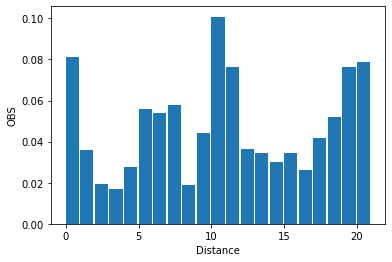

---------Paire AA --------
---------Scores---------
{0: -2.1912091260601154, 1: -1.5651502267811799, 2: -1.1575865881378948, 3: -0.6442811446027085, 4: -0.572273001188858, 5: -0.5798691129360989, 6: -0.5245676948815692, 7: -0.5451565742782176, 8: 0.7226696515722573, 9: -0.012125854669657174, 10: -0.6650083814012773, 11: -0.2343816546619222, 12: 0.5262733247757216, 13: 0.6706477766186836, 14: 0.8284704796810087, 15: 0.7468627144593281, 16: 1.0354381054735944, 17: 0.5771266941846035, 18: 0.44762772848790416, 19: 0.052485368235865144, 20: 0.012324635222290263}


rm: AA.txt: No such file or directory


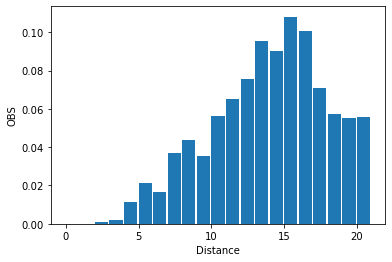

---------Paire AC --------
---------Scores---------
{0: 5.6849232973011, 1: 4.106484859914737, 2: 2.0789742225178967, 3: 1.3990514010101243, 4: 0.304858817496359, 5: 0.3864749707066036, 6: 0.6380410663791579, 7: -0.09828850580029702, 8: -0.11842386555367301, 9: 0.21551567815018957, 10: -0.08568221164428677, 11: -0.07666802427062819, 12: -0.2111971168762364, 13: -0.3426872906769754, 14: -0.26695983983578087, 15: -0.4019372398205291, 16: -0.30189515229078506, 17: 0.053574700333654725, 18: 0.3557505117639687, 19: 0.36988327061148046, 20: 0.35298270043038343}


rm: AC.txt: No such file or directory


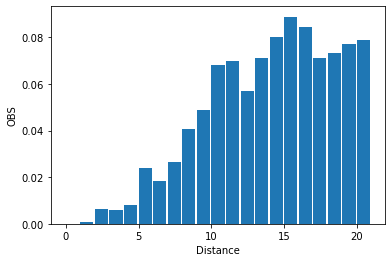

---------Paire AG --------
---------Scores---------
{0: 10, 1: 2.1251333143194286, 2: -0.038607772671098474, 3: 0.39752860809295915, 4: 0.6642441308594733, 5: 0.26124099006469015, 6: 0.5540574907918951, 7: 0.24213022774035522, 8: -0.03847691572794621, 9: -0.10791460084599838, 10: -0.2723193777591181, 11: -0.1454368500803986, 12: 0.07025379979383416, 13: -0.05043130334755872, 14: -0.15369915421227334, 15: -0.20575570019788345, 16: -0.1250178964440893, 17: 0.047758911362154634, 18: 0.10867468170729314, 19: 0.037686796512430655, 20: 0.00859062052094014}


rm: AG.txt: No such file or directory


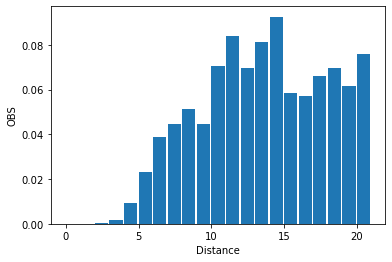

---------Paire AU --------
---------Scores---------
{0: 10, 1: 10, 2: 2.68404145365246, 3: 1.7095161168483328, 4: 0.5092256904543974, 5: 0.2933280542333868, 6: -0.1967703097402757, 7: -0.2806165806136822, 8: -0.27362490304632564, 9: -0.01731344029997863, 10: -0.30551796079444987, 11: -0.3270899172637044, 12: -0.12909649231128692, 13: -0.18062875357492, 14: -0.2951755056712177, 15: 0.21605192273095486, 16: 0.2684366052191082, 17: 0.1224658631747973, 18: 0.15961825501504898, 19: 0.26224077420885106, 20: 0.04747508139095249}


rm: AU.txt: No such file or directory


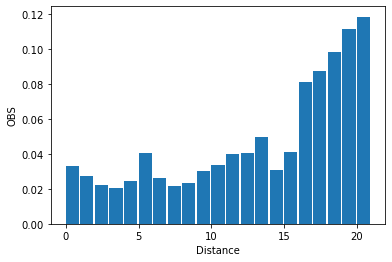

---------Paire CC --------
---------Scores---------
{0: -1.295932003759662, 1: -1.291977968229564, 2: -1.2840580929337144, 3: -0.818497533549604, 4: -0.4580041047893841, 5: -0.261545945671453, 6: 0.20041484695457654, 7: 0.4503683784693112, 8: 0.5197369806819606, 9: 0.3816170867594111, 10: 0.44060796020346343, 11: 0.4245718600358121, 12: 0.4093679402593064, 13: 0.3162634828702935, 14: 0.8133089703522313, 15: 0.5628742607786401, 16: -0.08584587910382513, 17: -0.15591488213167762, 18: -0.18355227401760132, 19: -0.3290870229798948, 20: -0.3964084949439252}


rm: CC.txt: No such file or directory


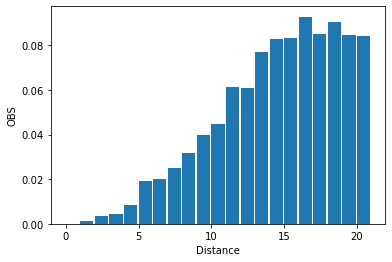

---------Paire CG --------
---------Scores---------
{0: 4.607424158268275, 1: 1.7864792525537327, 2: 0.6289267903900495, 3: 0.7181284226682179, 4: 0.6144182734761808, 5: 0.4971095719699688, 6: 0.46381164191752333, 7: 0.29253718004137474, 8: 0.21368243540184015, 9: 0.09961007330053635, 10: 0.1451358733367258, 11: -0.01377172260519135, 12: 0.004998987345727577, 13: -0.12654763234246408, 14: -0.18194462841221049, 15: -0.14372586957444963, 16: -0.22102168039999917, 17: -0.12970585798415785, 18: -0.10386393120945762, 19: -0.05306545619520136, 20: -0.0545020314550683}


rm: CG.txt: No such file or directory


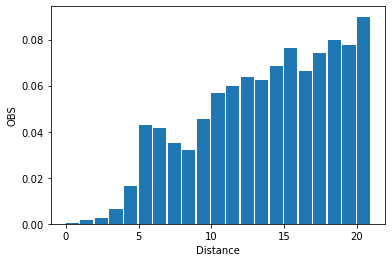

---------Paire CU --------
---------Scores---------
{0: 3.467195867529698, 1: 1.6345232917590935, 2: 0.8946628818580625, 3: 0.3550568903749399, 4: -0.04541945776354646, 5: -0.31642309633201227, 6: -0.2729071407273477, 7: -0.0423744822581242, 8: 0.1981583881730964, 9: -0.03914772807212741, 10: -0.09119158513591953, 11: 0.010701422021144269, 12: -0.039904566790007354, 13: 0.07976523009408977, 14: 0.002079543436284926, 15: -0.05340805365553343, 16: 0.11500885776715586, 17: 0.006092647670105161, 18: 0.02381110125181109, 19: 0.03424712840636235, 20: -0.12240144910751918}


rm: CU.txt: No such file or directory


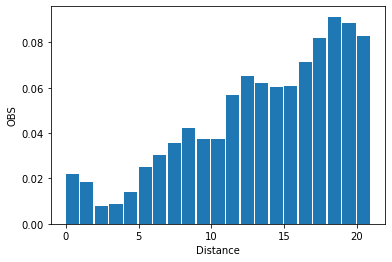

---------Paire GG --------
---------Scores---------
{0: -0.8855166991315145, 1: -0.8931002923529126, 2: -0.26914260744701823, 3: 0.04745966940046155, 4: 0.1216740802804412, 5: 0.2218467042449406, 6: 0.05022362005829188, 7: -0.05932463271309901, 8: -0.07571094378638689, 9: 0.15920606800744166, 10: 0.3270710736169808, 11: 0.062923311499667, 12: -0.06352244267902592, 13: 0.08620231005459085, 14: 0.1301819348919259, 15: 0.17102116919056723, 16: 0.04458648856266331, 17: -0.09370174653232302, 18: -0.11219633575755651, 19: -0.09656500548106853, 20: -0.040089258918758836}


rm: GG.txt: No such file or directory


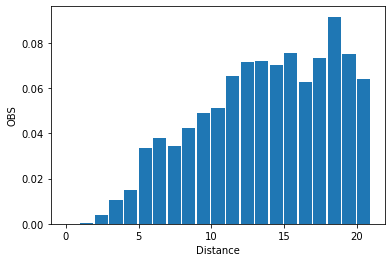

---------Paire GU --------
---------Scores---------
{0: 6.61836438151998, 1: 2.8708722437640932, 2: 0.5077060296525966, 3: -0.1581845210203326, 4: 0.05022825441885941, 5: -0.07108419723181975, 6: -0.1797101336410173, 7: -0.031029355466575155, 8: -0.08487043050072982, 9: -0.11632884202835048, 10: 0.015704491132241507, 11: -0.07589997137393804, 12: -0.15688256722101368, 13: -0.05814714713616714, 14: -0.019440719814731725, 15: -0.04608677869263694, 16: 0.16996721161951406, 17: 0.02048540282249443, 18: -0.11513330368245588, 19: 0.06408754397521174, 20: 0.21994577592072487}


rm: GU.txt: No such file or directory


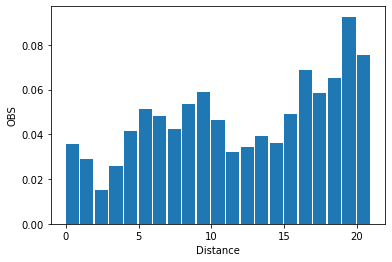

---------Paire UU --------
---------Scores---------
{0: -1.3707398904457846, 1: -1.3581229514111588, 2: -0.9048662412497861, 3: -1.0474332514823317, 4: -0.9706775431736794, 5: -0.497650766465612, 6: -0.41347886872752726, 7: -0.23210168286058486, 8: -0.31912539618642216, 9: -0.2979187262552774, 10: 0.10905832292649527, 11: 0.6349178747915476, 12: 0.5738120426835133, 13: 0.5503025435441865, 14: 0.6403759406089069, 15: 0.3871615670971798, 16: 0.07522116952157712, 17: 0.24213199401779117, 18: 0.22770662670729497, 19: -0.14385039065819466, 20: 0.05222477285836489}


In [27]:
for k,v in d.items():
    pair = '{}'.format(k)
    dic_f_obs = observe_frequency(v)
    print('---------Paire {} --------'.format(k))
    # print('observed frequence:\n')
    # print(dic_f_obs)
    # for i in range(20):
    dic_score = score(dic_f_obs,dic_f_ref)
    print('---------Scores---------')
    write_txt(pair, dic_score)
    print(dic_score)

In [72]:
# for i in range(20):
#     dic_score = score(dic_f_obs,dic_f_ref[i])
#     print('---------D:{}---------'.format(i))
#     print(dic_score)

In [73]:
# dic_f_obs

In [74]:
# dic_f_ref